In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
#%matplotlib qt

In [48]:
df = pd.read_csv("data/data_uci.csv",sep=";")

In [49]:
df.head()

,edad,td,par,col,fcm,riesgo
0,63,1,145,233,150,bajo
1,67,4,160,286,108,alto
2,67,4,120,229,129,alto
3,37,3,130,250,187,bajo
4,41,2,130,204,172,bajo


In [50]:
#Interpolacion de valores 0 para Frecuencia cardiaca maxima
df['fcm'].replace(to_replace=0, value=np.nan, inplace=True)
df['fcm'].interpolate(method='linear', inplace=True)
df['fcm'].describe()

count    303.000000
mean     149.698020
std       22.617172
min       71.000000
25%      136.000000
50%      152.000000
75%      165.000000
max      202.000000
Name: fcm, dtype: float64

In [51]:
#Interpolacion de valores 0 para presion arterial en reposo
df['par'].replace(to_replace=0, value=np.nan, inplace=True)
df['par'].replace(to_replace=-1, value=np.nan, inplace=True)
df['par'].interpolate(method='linear', inplace=True)
df['par'].describe()

count    303.000000
mean     131.724422
std       17.643214
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: par, dtype: float64

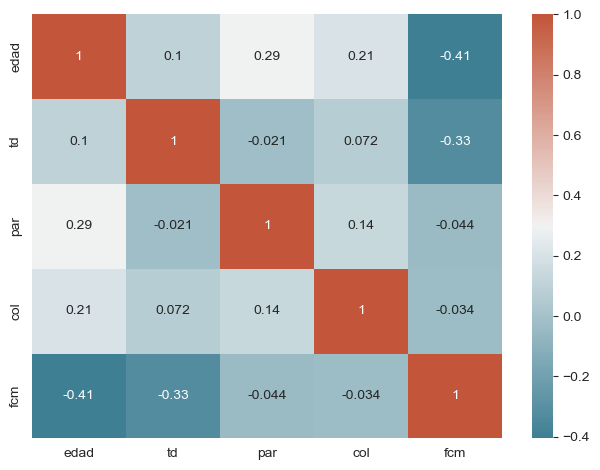

In [52]:
#Analizamos correlacion
corr = df.corr(numeric_only = True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()

In [53]:
#Modificamos el dataset para trabajar los datos categoricos
df['riesgo'] = df['riesgo'].map({'bajo':0,'alto':1})

In [94]:
#Separamos las variables objetivo y entrada.
X = df[['edad','td','par','col','fcm']]
Y = df['riesgo']


<Axes: xlabel='riesgo', ylabel='count'>

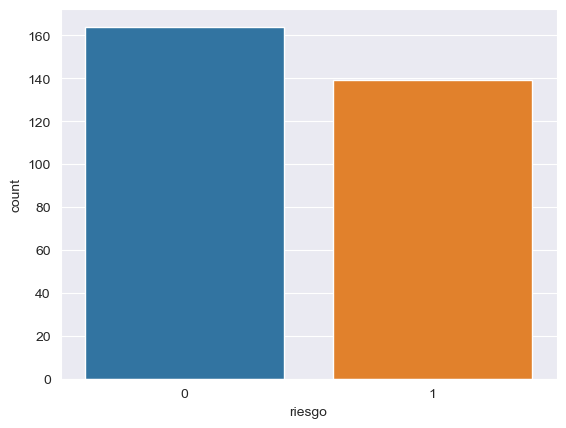

In [95]:
# Previo al oversampling
fig = plt.figure()
target = df['riesgo']
sns.countplot(x=target)

In [89]:
#Aplicamos el oversampling visto en clases de práctica:
from imblearn.over_sampling import RandomOverSampler

<Axes: xlabel='riesgo', ylabel='count'>

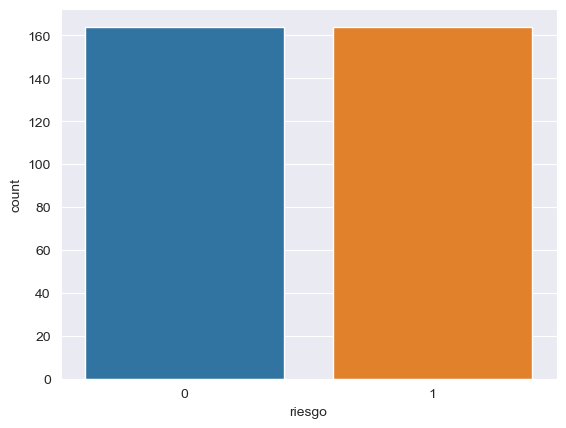

In [97]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = oversample.fit_resample(X, Y)
sns.countplot(x=Y_over)

In [98]:
# Normalizacion
def mean_norm(df_input):
    return df_input.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

def minmax_norm(df_input):
    return (df_input - df_input.min()) / (df_input.max() - df_input.min())

X_over_normalized = minmax_norm(X_over)

In [99]:
X_over_normalized

,edad,td,par,col,fcm
0,0.708333,0.000000,0.481132,0.244292,0.603053
1,0.791667,1.000000,0.622642,0.365297,0.282443
2,0.791667,1.000000,0.245283,0.235160,0.442748
3,0.166667,0.666667,0.339623,0.283105,0.885496
4,0.250000,0.333333,0.339623,0.178082,0.770992
...,...,...,...,...,...
323,0.458333,1.000000,0.433962,0.392694,0.389313
324,0.708333,1.000000,0.528302,0.641553,0.633588
325,0.791667,1.000000,0.245283,0.253425,0.000000
326,0.312500,1.000000,0.169811,0.374429,0.625954
